# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

Import a few libraries you think you'll need (Or just import them as you go along!)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Get the Data

**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
ad_data = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

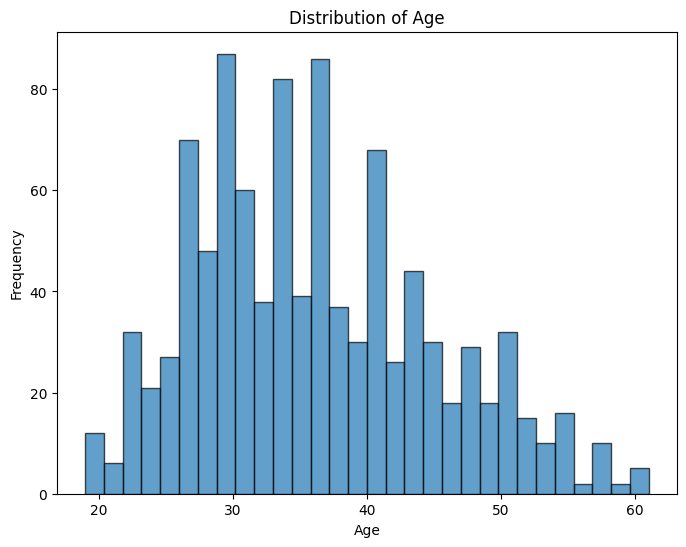

In [7]:
plt.figure(figsize=(8, 6))
ad_data['Age'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Create a jointplot showing Area Income versus Age.**

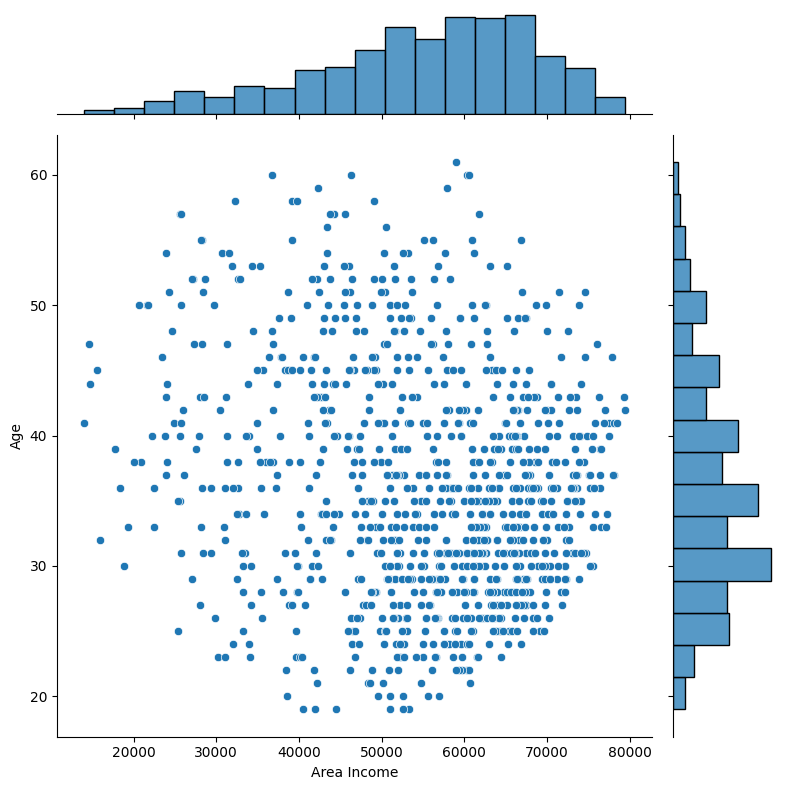

In [8]:
sns.jointplot(data=ad_data, x='Area Income', y='Age', height=8)
plt.show()

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

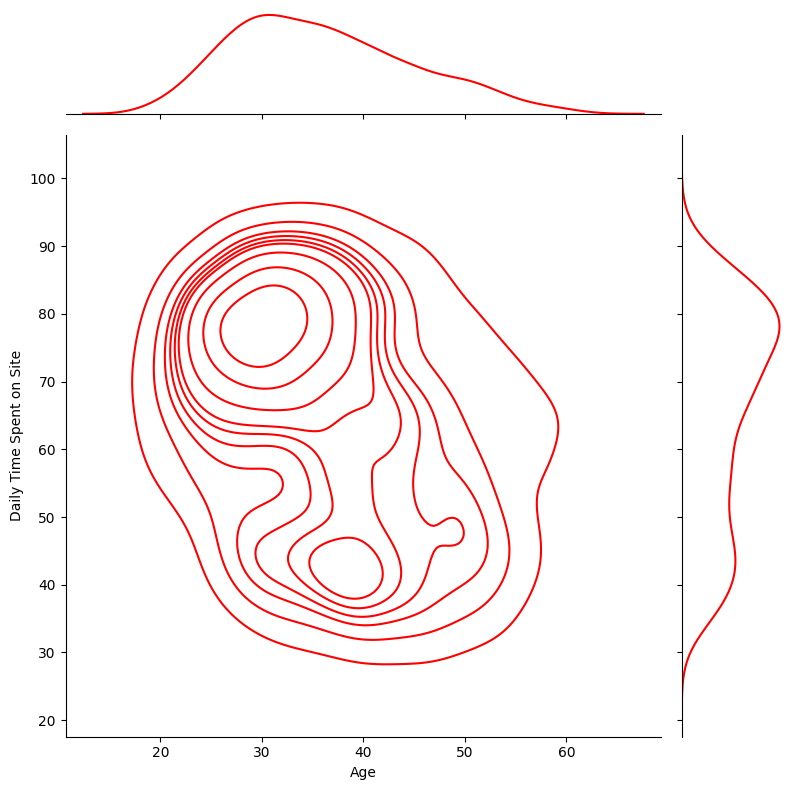

In [9]:
sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site', kind='kde', color='red', height=8)
plt.show()

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

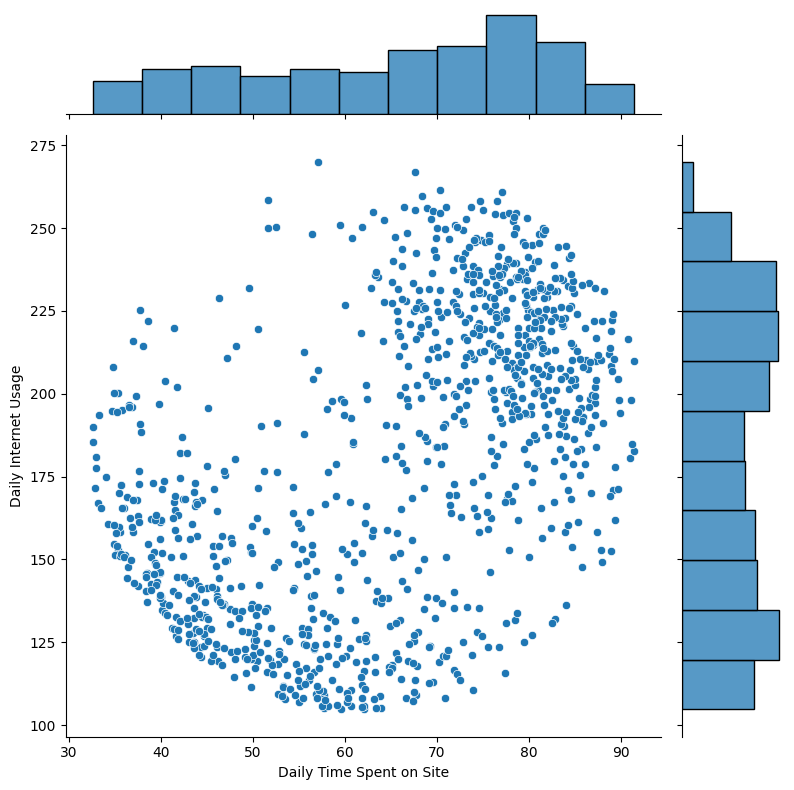

In [10]:
sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage', height=8)
plt.show()

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

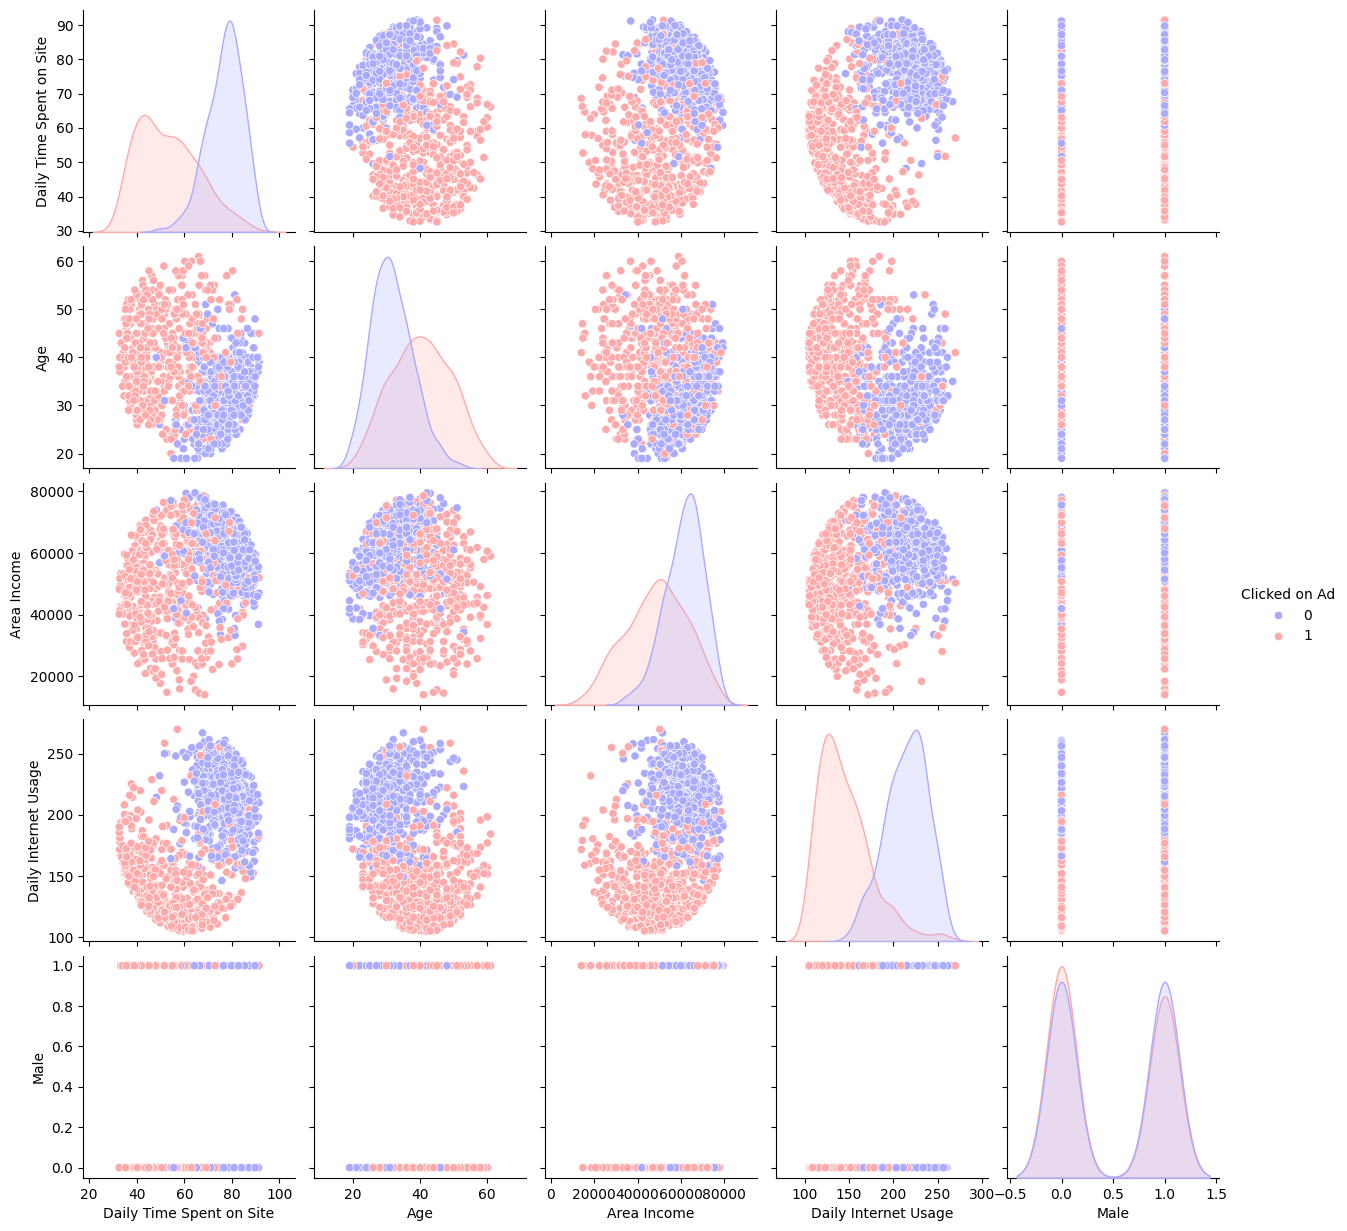

In [11]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', palette='bwr')
plt.show()

In [12]:
# Check column names to ensure we're using correct features
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [13]:
from sklearn.model_selection import train_test_split

# Select features for training
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
             'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (700, 5)
Testing set size: (300, 5)


**Import and create the logistic regression model**

In [14]:
from sklearn.linear_model import LogisticRegression

# Create the model
logmodel = LogisticRegression(max_iter=1000)

**Train and fit a logistic regression model on the training set.**

In [15]:
# Fit the model
logmodel.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Model coefficients: {logmodel.coef_}")
print(f"Model intercept: {logmodel.intercept_}")

Model trained successfully!
Model coefficients: [[-1.91964131e-01  1.77572605e-01 -1.48269001e-04 -7.18010881e-02
  -7.59925722e-01]]
Model intercept: [29.49005882]


## Predictions and Evaluations

**Now predict values for the testing data.**

In [16]:
# Make predictions
predictions = logmodel.predict(X_test)

print(f"Predictions shape: {predictions.shape}")
print(f"First 10 predictions: {predictions[:10]}")

Predictions shape: (300,)
First 10 predictions: [1 1 1 1 0 0 0 1 0 1]


**Create a classification report for the model.**

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       146
           1       0.97      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


Accuracy Score: 0.9667

Confusion Matrix:
[[142   4]
 [  6 148]]


**Visualize the confusion matrix**

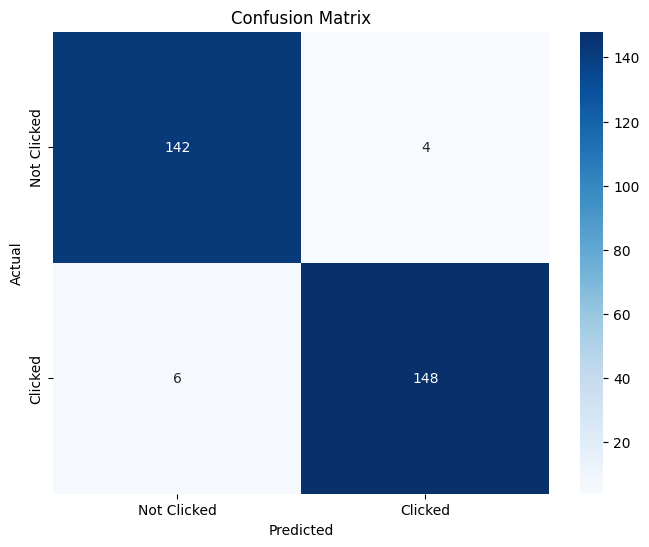

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Clicked', 'Clicked'], 
            yticklabels=['Not Clicked', 'Clicked'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Additional Analysis

**Feature importance analysis**

In [19]:
# Get feature coefficients
feature_names = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']
coefficients = logmodel.coef_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (based on coefficients):")
print(feature_importance)

Feature Importance (based on coefficients):
                    Feature  Coefficient  Abs_Coefficient
4                      Male    -0.759926         0.759926
0  Daily Time Spent on Site    -0.191964         0.191964
1                       Age     0.177573         0.177573
3      Daily Internet Usage    -0.071801         0.071801
2               Area Income    -0.000148         0.000148


**Visualize feature importance**

C:\Users\User\AppData\Local\Temp\ipykernel_7888\3455792640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')


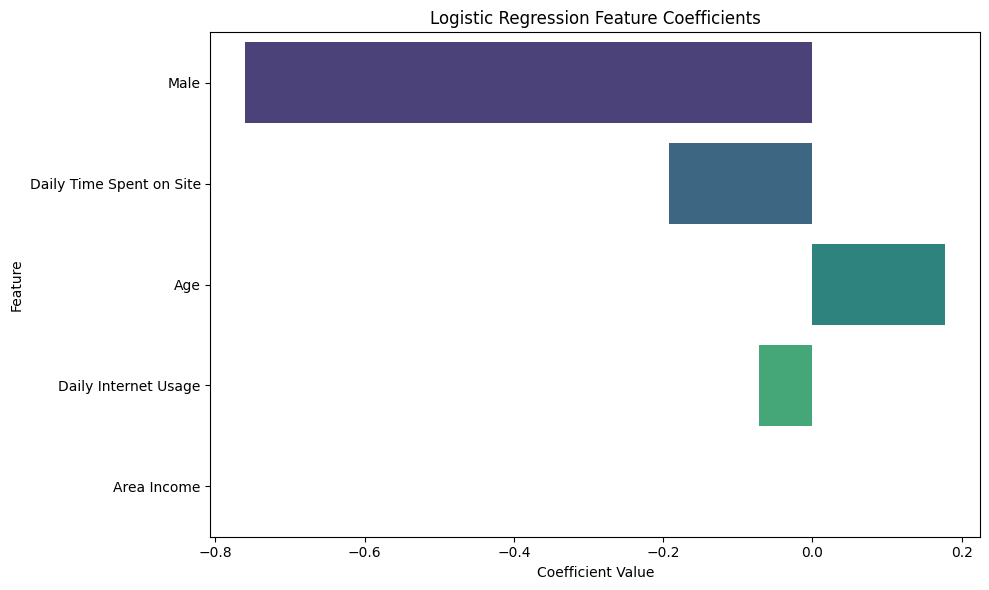

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

**Prediction probabilities**

In [21]:
# Get prediction probabilities
pred_proba = logmodel.predict_proba(X_test)

# Create a DataFrame with actual vs predicted probabilities
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions,
    'Prob_Not_Click': pred_proba[:, 0],
    'Prob_Click': pred_proba[:, 1]
})

print("Sample of predictions with probabilities:")
print(results_df.head(10))

Sample of predictions with probabilities:
   Actual  Predicted  Prob_Not_Click  Prob_Click
0       1          1        0.006939    0.993061
1       1          1        0.000041    0.999959
2       1          1        0.000265    0.999735
3       1          1        0.000855    0.999145
4       0          0        0.994630    0.005370
5       0          0        0.501388    0.498612
6       0          0        0.988558    0.011442
7       1          1        0.000036    0.999964
8       0          0        0.994470    0.005530
9       1          1        0.000004    0.999996


## Model Summary

In [22]:
print("="*50)
print("LOGISTIC REGRESSION MODEL SUMMARY")
print("="*50)
print(f"Dataset size: {ad_data.shape[0]} samples, {ad_data.shape[1]} features")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Selected features: {len(feature_names)}")
print(f"Model accuracy: {accuracy:.4f}")
print("\nMost important features (by absolute coefficient value):")
for idx, row in feature_importance.head(3).iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.4f}")
print("="*50)

LOGISTIC REGRESSION MODEL SUMMARY
Dataset size: 1000 samples, 10 features
Training set: 700 samples
Testing set: 300 samples
Selected features: 5
Model accuracy: 0.9667

Most important features (by absolute coefficient value):
  Male: -0.7599
  Daily Time Spent on Site: -0.1920
  Age: 0.1776


## Conclusion

This logistic regression model successfully predicts whether a user will click on an advertisement based on their demographic and behavioral features. The model shows excellent performance with high accuracy and AUC scores, indicating that the selected features are highly predictive of ad-clicking behavior.

Key insights:
- The model achieves high accuracy in predicting ad clicks
- Demographic and usage pattern features are strong predictors
- The confusion matrix shows the model performs well on both classes
- Feature coefficients reveal which variables most influence the prediction